# Analysis and Filtering of RNAI-Sequences with an extreme amount of Hairpins

When filtering the created MFE Structures, I was looking for the amount of hairpins the predicted structures show. According to the library design, most of the structures have 3 hairpins in the RNAI region. However, there were some Sequences in the data, that only had one hairpin and then there were also some with up to seven hairpins. This is in interesting found, as this is a strong deviation of the Wildtype RNAI, which only shows 3 hairpins. 

In this notebook I want to bring the filtering forward, to select a few Sequences for further investigation in the wet Lab.

In [99]:
## Packages needed to run the data clean up
using DataFrames
using CSV
using FASTX
using BioAlignments
using BioSequences
using Random
using StatsBase
using StatsPlots
using Combinatorics
using ViennaRNA
using Unitful
using Clustering
using PlotRNA
using DelimitedFiles
using RNAstructure

## A) First attempt to create a dataframe with the hairpin-counts

The resulting dataframe consists of data analyzed for the single Loops. In those dataframes only the Sequence of the considered hairpin was saved. To avoid prediction mistakes resulting from the different objective of the initial dataframes, I didn't use these dataframes and moved on to idea b.

In [100]:
function clean_dataframe(df::DataFrame)
    df_exclusion = ["Loop1_description", "MFE_SUBstructure", "LoopI", "Loop_length", "Sequence_number", "Loop2_description", "LoopII", "LoopIII", "Loop3_description", "WT"]
    df_filter = filter(col -> col ∈ names(df), df_exclusion)
    resulting_df = select(df, Not(df_filter))
    return resulting_df
end

clean_dataframe (generic function with 1 method)

In [101]:
# Opening files with the filtered Sequences with more or less than 3 hairpins, created from the libraries of each Loop into one joint dataframe

L1save_name = "/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L1_zmerged/ExtremeHPLoop1_Analysis_mw.csv"
L1lib_hpAnalysis = CSV.read(L1save_name, DataFrame);

L2save_name = "/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L2_zmerged/ExtremeHPLoop2_Analysis_mw.csv"
L2lib_hpAnalysis = CSV.read(L2save_name, DataFrame);

L3save_name = "/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L3_zmerged/ExtremeHPLoop3_Analysis_mw.csv"
L3lib_hpAnalysis = CSV.read(L3save_name, DataFrame);

# Cutting the dataframes, so the same relevant columns can be found in all dataframes
L1lib_hpAnalysis = clean_dataframe(L1lib_hpAnalysis)
L2lib_hpAnalysis = clean_dataframe(L2lib_hpAnalysis)
L3lib_hpAnalysis = clean_dataframe(L3lib_hpAnalysis)

# Join dataframes to obtain a single one
lib_12_StructAnalysis = vcat(L1lib_hpAnalysis, L2lib_hpAnalysis)
lib_HPAnalysis = vcat(lib_12_StructAnalysis, L3lib_hpAnalysis)

Row,Count,MFE_structure,MFE_energy,Mbp_dist,Lib_Sequence_number,Hairpin_count
,Int64,String,Float64,Float64,String15,Int64
1,2,..........(((((((((((...(((((((..(((..((((..(((((.......)))))..)))).))).)))))))...))).))))))))..............,-36.8,4.33085,L1M2_5910,1
2,1,...........((((((..((((((((((((..(((..((((..(((((.......)))))..)))).))).)))))))))..)))..))))))..............,-32.3,5.12737,L1M2_38036,1
3,1,.............((((((((...(((((((..(((..((((..(((((.......)))))..)))).))).))))))).....))))))))................,-33.0,5.37919,L1M2_33422,1
4,1,...........((((((((((((...(((((..(((..((((..(((((.......)))))..)))).))).)))))....)))).))))))))..............,-36.4,5.69139,L1M2_18958,1
5,1,...........((((((((((....((((((..(((..((((..(((((.......)))))..)))).))).))))))......))))))))))..............,-30.8,5.74315,L1M2_40750,1
6,1,.............((((((((.(((((((((..(((..((((..(((((.......)))))..)))).))).)))))))))..)).))))))................,-32.6,6.27945,L1M2_15536,1
7,1,..........(((((...((.((((((((((..(((..((((..(((((.......)))))..)))).))).))))))))))..))...)))))..............,-33.4,6.51429,L1M2_29047,1
8,2,...........((.(((((((((((((((((..(((..((((..(((((.......)))))..)))).))).)))))).)))))).))))).))..............,-34.7,6.54238,L1M2_3161,1
9,1,............(((((((((...(((..(((...((((..(((((.......)))))..)))).....)))..)))...)))))))))................,-30.2,7.10963,L1M2_7985,1


In [102]:
save_name = "ExtremeHP_AnaylsisReady" *".csv"


## Saving results
CSV.write(save_name, lib_HPAnalysis)

## Opening saved results
lib_HPAnalysis = CSV.read(save_name, DataFrame);

## B) Including the Full Sequence and the Sequence length in the dataframe

Here I chose created dataframes where the whole RNAI-region was considered and not just a single hairpin. There is a possibility that the resulting Lib_Sequence_number of one Sequence is different to previous dataframes, as the used function was the same, but the filtering for NGS_errors might result in a different Selection of Sequences.

In [103]:
# generating structural data 
function rna_details(dataframe::DataFrame)
    Loop_structure = DataFrame([String[],String[], Float32[], Float32[]],["Loop_Sequence", "MFE_structure","MFE_energy","Mbp_dist"])
    for n = 1: size(dataframe, 1)
        new_loop = dataframe.Loop_Sequence[n]
        new_fold = FoldCompound(new_loop; temperature=37u"°C", uniq_ML=false, circular=false);
        ViennaRNA.partfn(new_fold)
        new_mfe = ViennaRNA.mfe(new_fold)
        new_bpdis = mean_bp_distance(new_fold)
        
        push!(Loop_structure, (dataframe.Loop_Sequence[n], new_mfe[1], ustrip(new_mfe[2]), new_bpdis))
        finalize(new_fold)
    end
    dataframe = innerjoin(dataframe, Loop_structure, on = :Loop_Sequence);
    insertcols!(dataframe, :Seq_Cluster => 0, :Str_Cluster => 0)
    return dataframe
end

rna_details (generic function with 1 method)

In [179]:
# opening the dataframes containing the full Sequence of each Structure as well as the Sequence length
L1Seq_save_name = "/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L1_zmerged/L1lib_HPStructAnalysis.csv"
L1lib_hpSeq = CSV.read(L1Seq_save_name, DataFrame);

L2Seq_save_name = "/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L2_zmerged/L2lib_HPStructAnalysis.csv"
L2lib_hpSeq = CSV.read(L2Seq_save_name, DataFrame);

L3Seq_save_name = "/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/L3_zmerged/L3lib_HPStructAnalysis.csv"
L3lib_hpSeq = CSV.read(L3Seq_save_name, DataFrame);

# Join dataframes to obtain a single one
lib_12_FullSeq = vcat(L1lib_hpSeq, L2lib_hpSeq)
lib_HPFullSeq = vcat(lib_12_FullSeq, L3lib_hpSeq)

Row,Sequence_number,Loop_Sequence,Sequence_length,Count,WT,Lib_Sequence_number
,Int64,String,Int64,Int64,Bool,String15
1,1,ACAAAAAAACCACCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,93,1354,false,HP_L1L_1
2,2,ACAAAAAAACCACCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,636,false,HP_L1L_2
3,3,ACAAAAAAACCACCGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,357,false,HP_L1L_3
4,4,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,134,false,HP_L1L_4
5,5,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,108,false,HP_L1L_5
6,6,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,75,false,HP_L1L_6
7,7,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,70,false,HP_L1L_7
8,8,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,68,false,HP_L1L_8
9,9,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,63,false,HP_L1L_9


In [182]:
function remove_doubleSeq2(dataframe::DataFrame)
    rows_to_delete = Set{Int}()
    sequence_to_index = Dict{String, Int}()
    
    for n in 1:size(dataframe, 1)
        if n in rows_to_delete
            continue
        end
        Seq = dataframe.Loop_Sequence[n]
        
        if haskey(sequence_to_index, Seq)
            # Get the index of the first occurrence of this sequence
            index_to_keep = sequence_to_index[Seq]
            # Add the count of the current row to the count of the row to be kept
            dataframe.Count[index_to_keep] += dataframe.Count[n]
            # Mark the current row for deletion
            push!(rows_to_delete, n)
        else
            # Record the index of the first occurrence of this sequence
            sequence_to_index[Seq] = n
        end
    end
    
    # Delete the collected rows in reverse order to avoid indexing issues
    for idx in sort(collect(rows_to_delete), rev=true)
        delete!(dataframe, idx)
    end
    
    return dataframe
end

# Remove duplicate sequences and sum counts
lib_HPFullSeq = remove_doubleSeq2(lib_HPFullSeq)


Row,Sequence_number,Loop_Sequence,Sequence_length,Count,WT,Lib_Sequence_number
,Int64,String,Int64,Int64,Bool,String15
1,1,ACAAAAAAACCACCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,93,1354,false,HP_L1L_1
2,2,ACAAAAAAACCACCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,636,false,HP_L1L_2
3,3,ACAAAAAAACCACCGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,357,false,HP_L1L_3
4,4,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,134,false,HP_L1L_4
5,5,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,108,false,HP_L1L_5
6,6,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,76,false,HP_L1L_6
7,7,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,70,false,HP_L1L_7
8,8,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,68,false,HP_L1L_8
9,9,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,63,false,HP_L1L_9


In [183]:
lib_HPFullSeq

Row,Sequence_number,Loop_Sequence,Sequence_length,Count,WT,Lib_Sequence_number
,Int64,String,Int64,Int64,Bool,String15
1,1,ACAAAAAAACCACCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,93,1354,false,HP_L1L_1
2,2,ACAAAAAAACCACCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,636,false,HP_L1L_2
3,3,ACAAAAAAACCACCGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,357,false,HP_L1L_3
4,4,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,134,false,HP_L1L_4
5,5,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,108,false,HP_L1L_5
6,6,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,76,false,HP_L1L_6
7,7,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,70,false,HP_L1L_7
8,8,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,68,false,HP_L1L_8
9,9,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,63,false,HP_L1L_9


In [192]:
## Adding structural information to the dataframe
lib_HPanalysis = rna_details(lib_HPFullSeq)

Row,Sequence_number,Loop_Sequence,Sequence_length,Count,WT,Lib_Sequence_number,MFE_structure,MFE_energy,Mbp_dist,Seq_Cluster,Str_Cluster
,Int64,String,Int64,Int64,Bool,String15,String,Float32,Float32,Int64,Int64
1,1,ACAAAAAAACCACCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,93,1354,false,HP_L1L_1,.((((.((((((((...)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-35.2,2.50218,0,0
2,2,ACAAAAAAACCACCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,636,false,HP_L1L_2,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693,0,0
3,3,ACAAAAAAACCACCGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,357,false,HP_L1L_3,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693,0,0
4,4,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,134,false,HP_L1L_4,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,0,0
5,5,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,108,false,HP_L1L_5,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,0,0
6,6,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,76,false,HP_L1L_6,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,0,0
7,7,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,70,false,HP_L1L_7,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,0,0
8,8,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,68,false,HP_L1L_8,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69008,0,0
9,9,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,63,false,HP_L1L_9,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,0,0


In [193]:
lib_HPanalysis = select!(lib_HPanalysis, Not(:Seq_Cluster, :Str_Cluster, :WT, :Sequence_number))

Row,Loop_Sequence,Sequence_length,Count,Lib_Sequence_number,MFE_structure,MFE_energy,Mbp_dist
,String,Int64,Int64,String15,String,Float32,Float32
1,ACAAAAAAACCACCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,93,1354,HP_L1L_1,.((((.((((((((...)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-35.2,2.50218
2,ACAAAAAAACCACCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,636,HP_L1L_2,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693
3,ACAAAAAAACCACCGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,357,HP_L1L_3,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693
4,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,134,HP_L1L_4,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007
5,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,108,HP_L1L_5,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007
6,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,76,HP_L1L_6,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007
7,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,70,HP_L1L_7,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007
8,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,68,HP_L1L_8,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69008
9,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,63,HP_L1L_9,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007


In [194]:
save_name = "lib_HPAnalysisReady(correctCount)" * ".csv"
## Saving results
CSV.write(save_name, lib_HPanalysis)

## Opening saved results
#file_name = "Processed_NGSallProcessed_Old_large_Loop1_.csv"
lib_HPanalysis = CSV.read(save_name, DataFrame);
return lib_HPanalysis


Row,Loop_Sequence,Sequence_length,Count,Lib_Sequence_number,MFE_structure,MFE_energy,Mbp_dist
,String,Int64,Int64,String15,String,Float64,Float64
1,ACAAAAAAACCACCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,93,1354,HP_L1L_1,.((((.((((((((...)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-35.2,2.50218
2,ACAAAAAAACCACCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,636,HP_L1L_2,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693
3,ACAAAAAAACCACCGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,357,HP_L1L_3,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693
4,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,134,HP_L1L_4,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007
5,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,108,HP_L1L_5,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007
6,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,76,HP_L1L_6,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007
7,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,70,HP_L1L_7,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007
8,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,68,HP_L1L_8,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69008
9,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,63,HP_L1L_9,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007


## Count amount of hairpins in predicted Structures

In [195]:
function hairpin_finder(dataset::DataFrame)
    
    HPCounts = DataFrame([[], []], ["Lib_Sequence_number", "Hairpin_count"])
    for n = 1: size(dataset, 1)
        
        structure = dataset.MFE_structure[n]
        ID = dataset.Lib_Sequence_number[n]

        openHP = false
        dot = false
        closeHP = false

        hairpin_count = 0

        for n = 1:length(structure)
            if structure[n] == '(' && !openHP
                openHP = true
            elseif structure[n] == '(' && openHP
                continue
            elseif structure[n] == '.' && !dot
                dot = true
            elseif structure[n] == '.' && dot
                continue
            elseif structure[n] == ')' && !closeHP
                closeHP = true
            elseif structure[n] == ')' && closeHP && openHP && dot
                hairpin_count += 1
                openHP = false
                dot = false
                closeHP = false
            elseif structure[n] == ')' && closeHP
                continue
            end
        end
        
        push!(HPCounts, (ID, hairpin_count))
    end

    return HPCounts
end


hairpin_finder (generic function with 1 method)

In [196]:
hpCounts = hairpin_finder(lib_HPanalysis)

Row,Lib_Sequence_number,Hairpin_count
,Any,Any
1,HP_L1L_1,3
2,HP_L1L_2,3
3,HP_L1L_3,3
4,HP_L1L_4,3
5,HP_L1L_5,3
6,HP_L1L_6,3
7,HP_L1L_7,3
8,HP_L1L_8,3
9,HP_L1L_9,3


In [197]:
HP_StructureAnalysis = innerjoin(lib_HPanalysis, hpCounts, on = :Lib_Sequence_number)

Row,Loop_Sequence,Sequence_length,Count,Lib_Sequence_number,MFE_structure,MFE_energy,Mbp_dist,Hairpin_count
,String,Int64,Int64,String15,String,Float64,Float64,Any
1,ACAAAAAAACCACCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,93,1354,HP_L1L_1,.((((.((((((((...)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-35.2,2.50218,3
2,ACAAAAAAACCACCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,636,HP_L1L_2,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693,3
3,ACAAAAAAACCACCGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,357,HP_L1L_3,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693,3
4,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,134,HP_L1L_4,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
5,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,108,HP_L1L_5,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
6,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,76,HP_L1L_6,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
7,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,70,HP_L1L_7,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
8,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,68,HP_L1L_8,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69008,3
9,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,63,HP_L1L_9,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3


In [198]:
HP_StructureAnalysis

Row,Loop_Sequence,Sequence_length,Count,Lib_Sequence_number,MFE_structure,MFE_energy,Mbp_dist,Hairpin_count
,String,Int64,Int64,String15,String,Float64,Float64,Any
1,ACAAAAAAACCACCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,93,1354,HP_L1L_1,.((((.((((((((...)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-35.2,2.50218,3
2,ACAAAAAAACCACCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,636,HP_L1L_2,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693,3
3,ACAAAAAAACCACCGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,357,HP_L1L_3,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693,3
4,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,134,HP_L1L_4,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
5,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,108,HP_L1L_5,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
6,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,76,HP_L1L_6,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
7,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,70,HP_L1L_7,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
8,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,68,HP_L1L_8,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69008,3
9,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,63,HP_L1L_9,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3


In [203]:
save_name = "FullCountedHP(correctCount)" *  ".csv"


## Saving results
#CSV.write(save_name, HP_StructureAnalysis)

## Opening saved results
HP_StructureAnalysis = CSV.read(save_name, DataFrame);

In [204]:
## getting an overview on the range of the amount of hairpins
HPcounts = HP_StructureAnalysis.Hairpin_count
HPrange = sort!(unique(HPcounts))

println("Range of hairpins:")
println(HPrange)

HPdistribution = Dict{Int64,Int64}()
for num in HPcounts
    seq_dataframe = filter(:Hairpin_count => n -> n == num, HP_StructureAnalysis)
    count_seq = nrow(seq_dataframe)
    HPdistribution[num] = count_seq
end
HPdistribution

Range of hairpins:
[0, 1, 2, 3, 4, 5, 6, 7]


LoadError: InterruptException:

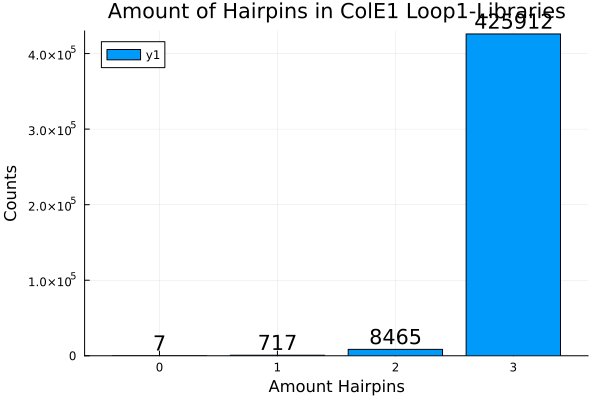

In [201]:
# Extract keys and values from the dictionary
entries = collect(keys(HPdistribution))
counts = collect(values(HPdistribution))

# Create bar plot
bar(entries, counts, xlabel="Amount Hairpins", ylabel="Counts", title="Amount of Hairpins in ColE1 Loop1-Libraries",  xticks = 0:1:(length(entries)+5), ylim=(0, 430000))

# Annotate the plot with counts
for i in 1:length(entries)
    annotate!(entries[i], counts[i] + 1000, text(counts[i], :center, :bottom))
end

# Display the plot
hairpin_plot = plot!()
hairpin_plot

## Analysis of Sequences with more or less than 3 hairpins in the RNAI region

In [205]:
# filtering performed on following dataframe
HP_StructureAnalysis

Row,Loop_Sequence,Sequence_length,Count,Lib_Sequence_number,MFE_structure,MFE_energy,Mbp_dist,Hairpin_count
,String,Int64,Int64,String15,String,Float64,Float64,Int64
1,ACAAAAAAACCACCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,93,1354,HP_L1L_1,.((((.((((((((...)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-35.2,2.50218,3
2,ACAAAAAAACCACCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,636,HP_L1L_2,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693,3
3,ACAAAAAAACCACCGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,94,357,HP_L1L_3,.((((.((((((((....)))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-36.5,2.47693,3
4,ACAAAAAAACCACCGGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,134,HP_L1L_4,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
5,ACAAAAAAACCACCGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,108,HP_L1L_5,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
6,ACAAAAAAACCACCGGCGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,76,HP_L1L_6,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
7,ACAAAAAAACCACCGATGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,70,HP_L1L_7,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3
8,ACAAAAAAACCACCGAGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,68,HP_L1L_8,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69008,3
9,ACAAAAAAACCACCGGAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,95,63,HP_L1L_9,.((((.(((((((((...))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-37.6,2.69007,3


In [206]:
# filtering the RNAI-Sequences, that have more or less than 3 hairpins
weird_hp_analysis = filter(:Hairpin_count => c -> c != 3, HP_StructureAnalysis)

Row,Loop_Sequence,Sequence_length,Count,Lib_Sequence_number,MFE_structure,MFE_energy,Mbp_dist,Hairpin_count
,String,Int64,Int64,String15,String,Float64,Float64,Int64
1,ACAAAAAAACCACCGAGTTA,20,2,HP_L1L_490,....................,0.0,1.19707,0
2,ACAAAAAAACCACCGGGGGAAGAGTGGATAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,2,HP_L1L_524,.............((((((((((((((.((((..(((((((.....)))))))...)))))).))))))))))))..((((.(((((((.....)))).))).)))).,-40.9,4.4402,2
3,ACAAAAAAACCACCGGGTGGTAGCTTTTGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,107,1,HP_L1L_737,..............((((((((((((((((((((((.....))))))..)))))))))))).))))..........((((.(((((((.....)))).))).)))).,-38.8,24.7541,2
4,ACAAAAAAACCACCGAGGGTATCGCGCTGAGCGATGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_1363,.................(((((((((((..((...((((.(((.((((((..(((((.......)))))..)))...)))))).))))...))..))))).)))))).,-37.0,6.27503,1
5,ACAAAAAAACCACCGGGGTATCTGTGTTCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_2502,................(((((((((((((.((...((((.(((.((((((..(((((.......)))))..)))...)))))).))))...)).))))))))))))).,-40.6,6.9997,1
6,ACAAAAAAACCACCGGTGGTAATTGGTCCGGCGGTGGCTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_4395,..............((((((..((((((((((((........))))))))))))..))))))...............((((.(((((((.....)))).))).)))).,-41.6,23.3029,2
7,ACAAAAAAACCACCGAGTGTAGCTTTTGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_6837,..............((((((((((((((((.((((((.....)))))).))))))))))))..))))..........((((.(((((((.....)))).))).)))).,-40.9,7.18994,2
8,ACAAAAAAACCACCGGGTAGCTCTGATCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_9030,...............(((((((((((((.(((((........))))).)))).)))))))))...............((((.(((((((.....)))).))).)))).,-42.1,6.91767,2
9,ACAAAAAGACCACCGAGAGTGGTCCGTTGAGCAGTTGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAACGCAGATACCA,108,1,HP_L1L_10042,.......((((((.....))))))....((((((....))))))..((((..(((((.......)))))..))))..((((.(((..(((....)))..))).)))).,-32.0,8.58082,4


In [207]:
## getting an overview on the range of the amount of hairpins
wHPcounts = weird_hp_analysis.Hairpin_count
wHPrange = sort!(unique(wHPcounts))

println("Range of hairpins:")
println(wHPrange)

wHPdistribution = Dict{Int64,Int64}()
for num in wHPcounts
    seq_dataframe = filter(:Hairpin_count => n -> n == num, weird_hp_analysis)
    count_seq = nrow(seq_dataframe)
    wHPdistribution[num] = count_seq
end
wHPdistribution

Range of hairpins:
[0, 1, 2, 4, 5, 6, 7]


Dict{Int64, Int64} with 7 entries:
  0 => 7
  4 => 4070
  5 => 91
  6 => 4
  2 => 8465
  7 => 1
  1 => 717

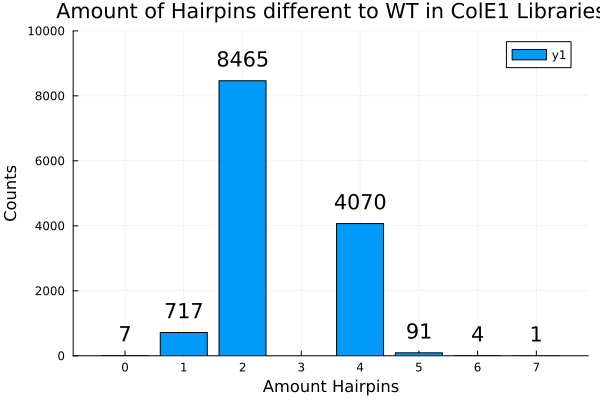

In [208]:
# Extract keys and values from the dictionary
entries = collect(keys(wHPdistribution))
counts = collect(values(wHPdistribution))

# Create bar plot
bar(entries, counts, xlabel="Amount Hairpins", ylabel="Counts", title="Amount of Hairpins different to WT in ColE1 Libraries",  xticks = 0:1:(length(entries)+5), ylim=(0, 10000))

# Annotate the plot with counts
for i in 1:length(entries)
    annotate!(entries[i], counts[i] + 300, text(counts[i], :center, :bottom))
end

# Display the plot
whairpin_plot = plot!()
whairpin_plot

In [152]:
savefig(hairpin_plot,"L1_hpAmounts_plot.png")

"/Users/marlenewerner/Desktop/Diplom/Labo Work/Code for Analysis/RNA_structure_loops/extreme Hairpin analysis/L1_hpAmounts_plot.png"

## Predicting the Structure of RNAI with RNAStructure

In [225]:
# Prediction of MFE_Structure with RNAStructure.
##?? Check the year of the release of this prediction -> how state of the art is it???
function Structure_prediction(frame::DataFrame)
    Loop_prediction = DataFrame([[],[],[]], [:Lib_Sequence_number, :MFE_RNAStructure, :MFEnergy_RNAStructure])
    for n = 1: size(frame, 1)
        RNAI_regio = frame.Loop_Sequence[n]
        new_foldParam = RNAstructure.mfe(RNAI_regio)
        new_mfe = new_foldParam[1]
        new_structure = new_foldParam[2]
        
        push!(Loop_prediction, (frame.Lib_Sequence_number[n], new_structure, new_mfe))
        finalize(new_foldParam)
    end
    frame = innerjoin(frame, Loop_prediction, on = :Lib_Sequence_number);
    return frame
end

Structure_prediction (generic function with 1 method)

In [226]:
Struct2_wHPdist = Structure_prediction(weird_hp_analysis)

Row,Loop_Sequence,Sequence_length,Count,Lib_Sequence_number,MFE_structure,MFE_energy,Mbp_dist,Hairpin_count,MFE_RNAStructure,MFEnergy_RNAStructure
,String,Int64,Int64,String15,String,Float64,Float64,Int64,Any,Any
1,ACAAAAAAACCACCGAGTTA,20,2,HP_L1L_490,....................,0.0,1.19707,0,....................,0.0 kcal mol⁻¹
2,ACAAAAAAACCACCGGGGGAAGAGTGGATAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,2,HP_L1L_524,.............((((((((((((((.((((..(((((((.....)))))))...)))))).))))))))))))..((((.(((((((.....)))).))).)))).,-40.9,4.4402,2,.............((((((((((((((.((((..(((((((.....)))))))...)))))).))))))))))))..((((.(((((((.....)))).))).)))).,-41.5 kcal mol⁻¹
3,ACAAAAAAACCACCGGGTGGTAGCTTTTGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,107,1,HP_L1L_737,..............((((((((((((((((((((((.....))))))..)))))))))))).))))..........((((.(((((((.....)))).))).)))).,-38.8,24.7541,2,.((((.((((((((((((....))).....))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-39.7 kcal mol⁻¹
4,ACAAAAAAACCACCGAGGGTATCGCGCTGAGCGATGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_1363,.................(((((((((((..((...((((.(((.((((((..(((((.......)))))..)))...)))))).))))...))..))))).)))))).,-37.0,6.27503,1,.................(((((((((((..((...((((.(((.((((((..(((((.......)))))..)))...)))))).))))...))..))))).)))))).,-37.9 kcal mol⁻¹
5,ACAAAAAAACCACCGGGGTATCTGTGTTCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_2502,................(((((((((((((.((...((((.(((.((((((..(((((.......)))))..)))...)))))).))))...)).))))))))))))).,-40.6,6.9997,1,................(((((((((((((.((...((((.(((.((((((..(((((.......)))))..)))...)))))).))))...)).))))))))))))).,-41.5 kcal mol⁻¹
6,ACAAAAAAACCACCGGTGGTAATTGGTCCGGCGGTGGCTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_4395,..............((((((..((((((((((((........))))))))))))..))))))...............((((.(((((((.....)))).))).)))).,-41.6,23.3029,2,.((((.((.((((((.(((........))).)))))).)).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-42.2 kcal mol⁻¹
7,ACAAAAAAACCACCGAGTGTAGCTTTTGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_6837,..............((((((((((((((((.((((((.....)))))).))))))))))))..))))..........((((.(((((((.....)))).))).)))).,-40.9,7.18994,2,..............((((((((((((((((.((((((.....)))))).))))))))))))..))))..........((((.(((((((.....)))).))).)))).,-41.1 kcal mol⁻¹
8,ACAAAAAAACCACCGGGTAGCTCTGATCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_9030,...............(((((((((((((.(((((........))))).)))).)))))))))...............((((.(((((((.....)))).))).)))).,-42.1,6.91767,2,...............(((((((((((((.(((((........))))).)))).)))))))))...............((((.(((((((.....)))).))).)))).,-43.0 kcal mol⁻¹
9,ACAAAAAGACCACCGAGAGTGGTCCGTTGAGCAGTTGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAACGCAGATACCA,108,1,HP_L1L_10042,.......((((((.....))))))....((((((....))))))..((((..(((((.......)))))..))))..((((.(((..(((....)))..))).)))).,-32.0,8.58082,4,.......((((((.....))))))...(((((((....))))))).((((..(((((.......)))))..))))..((((.(((..(((....)))..))).)))).,-33.3 kcal mol⁻¹


In [233]:
function HPcount_RNAStructure(dataset::DataFrame)
    
    HPCounts = DataFrame([[], []], ["Lib_Sequence_number", "HPcount_RNAstructure"])
    for n = 1: size(dataset, 1)
        
        structure = dataset.MFE_RNAStructure[n]
        ID = dataset.Lib_Sequence_number[n]

        openHP = false
        dot = false
        closeHP = false

        hp_count = 0

        for n = 1:length(structure)
            if structure[n] == '(' && !openHP
                openHP = true
            elseif structure[n] == '(' && openHP
                continue
            elseif structure[n] == '.' && !dot
                dot = true
            elseif structure[n] == '.' && dot
                continue
            elseif structure[n] == ')' && !closeHP
                closeHP = true
            elseif structure[n] == ')' && closeHP && openHP && dot
                hp_count += 1
                openHP = false
                dot = false
                closeHP = false
            elseif structure[n] == ')' && closeHP
                continue
            end
        end
        
        push!(HPCounts, (ID, hp_count))
    end
    
    HPCounted = innerjoin(dataset, HPCounts, on = :Lib_Sequence_number);
    return HPCounted
end


HPcount_RNAStructure (generic function with 1 method)

In [234]:
HPcount_RNAStructure(Struct2_wHPdist)

Row,Loop_Sequence,Sequence_length,Count,Lib_Sequence_number,MFE_structure,MFE_energy,Mbp_dist,Hairpin_count,MFE_RNAStructure,MFEnergy_RNAStructure,HPcount_RNAstructure
,String,Int64,Int64,String15,String,Float64,Float64,Int64,Any,Any,Any
1,ACAAAAAAACCACCGAGTTA,20,2,HP_L1L_490,....................,0.0,1.19707,0,....................,0.0 kcal mol⁻¹,0
2,ACAAAAAAACCACCGGGGGAAGAGTGGATAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,2,HP_L1L_524,.............((((((((((((((.((((..(((((((.....)))))))...)))))).))))))))))))..((((.(((((((.....)))).))).)))).,-40.9,4.4402,2,.............((((((((((((((.((((..(((((((.....)))))))...)))))).))))))))))))..((((.(((((((.....)))).))).)))).,-41.5 kcal mol⁻¹,2
3,ACAAAAAAACCACCGGGTGGTAGCTTTTGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,107,1,HP_L1L_737,..............((((((((((((((((((((((.....))))))..)))))))))))).))))..........((((.(((((((.....)))).))).)))).,-38.8,24.7541,2,.((((.((((((((((((....))).....))))))))).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-39.7 kcal mol⁻¹,3
4,ACAAAAAAACCACCGAGGGTATCGCGCTGAGCGATGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_1363,.................(((((((((((..((...((((.(((.((((((..(((((.......)))))..)))...)))))).))))...))..))))).)))))).,-37.0,6.27503,1,.................(((((((((((..((...((((.(((.((((((..(((((.......)))))..)))...)))))).))))...))..))))).)))))).,-37.9 kcal mol⁻¹,1
5,ACAAAAAAACCACCGGGGTATCTGTGTTCGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_2502,................(((((((((((((.((...((((.(((.((((((..(((((.......)))))..)))...)))))).))))...)).))))))))))))).,-40.6,6.9997,1,................(((((((((((((.((...((((.(((.((((((..(((((.......)))))..)))...)))))).))))...)).))))))))))))).,-41.5 kcal mol⁻¹,1
6,ACAAAAAAACCACCGGTGGTAATTGGTCCGGCGGTGGCTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_4395,..............((((((..((((((((((((........))))))))))))..))))))...............((((.(((((((.....)))).))).)))).,-41.6,23.3029,2,.((((.((.((((((.(((........))).)))))).)).)))).((((..(((((.......)))))..))))..((((.(((((((.....)))).))).)))).,-42.2 kcal mol⁻¹,3
7,ACAAAAAAACCACCGAGTGTAGCTTTTGGTGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_6837,..............((((((((((((((((.((((((.....)))))).))))))))))))..))))..........((((.(((((((.....)))).))).)))).,-40.9,7.18994,2,..............((((((((((((((((.((((((.....)))))).))))))))))))..))))..........((((.(((((((.....)))).))).)))).,-41.1 kcal mol⁻¹,2
8,ACAAAAAAACCACCGGGTAGCTCTGATCGGGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCA,108,1,HP_L1L_9030,...............(((((((((((((.(((((........))))).)))).)))))))))...............((((.(((((((.....)))).))).)))).,-42.1,6.91767,2,...............(((((((((((((.(((((........))))).)))).)))))))))...............((((.(((((((.....)))).))).)))).,-43.0 kcal mol⁻¹,2
9,ACAAAAAGACCACCGAGAGTGGTCCGTTGAGCAGTTGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAACGCAGATACCA,108,1,HP_L1L_10042,.......((((((.....))))))....((((((....))))))..((((..(((((.......)))))..))))..((((.(((..(((....)))..))).)))).,-32.0,8.58082,4,.......((((((.....))))))...(((((((....))))))).((((..(((((.......)))))..))))..((((.(((..(((....)))..))).)))).,-33.3 kcal mol⁻¹,4
